# Topic Visualization

Visualize topic distributions of Posts from enhanced Topic Model (topic_tokenizer2 and enhanced preprocessing).

In [1]:
import os, sys, ast
sys.path.append("..")
from config import credentials
import dropbox

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random_state = 23

## Loading

In [3]:
team_dbx = dropbox.DropboxTeam(credentials.dropbox_team_access_token)
team_root = team_dbx.with_path_root(dropbox.common.PathRoot.namespace_id(
    credentials.dropbox_team_namespace_id))
user_dbx = team_root.as_user(credentials.dropbox_team_member_id)

In [4]:
data_path = "/Data/CSVData"
model_path = "../models"
figures_path = "../reports/figures/"

In [5]:
topics20_fpath = os.path.join(data_path, "topics", "final_topics_LDAn20.csv")
_, res = user_dbx.files_download(topics20_fpath)
topics20 = pd.read_csv(res.raw)

posts_fpath = os.path.join(data_path, "PolPosts.csv")
_, res = user_dbx.files_download(posts_fpath)
posts = pd.read_csv(res.raw)

print("Topics n20", topics20.shape)
print("All Posts", posts.shape)

Topics n20 (21970, 4)
All Posts (27204, 23)


## Postprocess topics

Join Posts with Topic tables and assign topics to duplicated texts.

In [6]:
# Join
data = posts.set_index("textID").join(topics20.set_index("textID"), lsuffix="_posts", rsuffix="_topics")

# Assign topics to duplicated texts
data.topic = data.topic.astype("Int64")
data.topic = data.groupby("text_posts")["topic"].ffill()

# Cleaning
data["source"] = data.Site
data.drop(["text_topics", "Site"], axis=1, inplace=True)
data.dropna(subset=["text_posts", "topic"], inplace=True)

data.shape

(23384, 24)

## Topic Interpretation

In [24]:
topic_interpretation = {0: "-", 1: "-", 2: "Wohnen", 3: "Grüne",
                        4: "Steuern / Geld", 5: "ÖVP Mobilisierung", 6: "Parteien", 
                        7: "Prognosen", 8: "KPÖ / Linke Forderungen", 9: "Dank / TV-Runde",
                        10: "Links / Alternativ", 11: "ÖVP", 12: "-",
                        13: "SPÖ", 14: "Volksparteien", 15: "-", 16: "FPÖ",
                        17: "-", 18: "Wahlkampfslogans", 19: "-", 20: "Stenzel Rede bei IB"}

topic_color = {"Wohnen": "rosybrown", "Grüne": "green", "Steuern / Geld": "darkblue",
               "ÖVP Mobilisierung": "mediumturquoise", "Parteien": "gold",
               "Prognosen": "darkcyan", "KPÖ / Linke Forderungen": "darkred",
               "Dank / TV-Runde": "palegreen", "Links / Alternativ": "lime",
               "ÖVP": "turquoise", "SPÖ": "red", "Volksparteien": "indigo", "FPÖ": "blue",
               "Wahlkampfslogans": "orange", "Stenzel Rede bei IB": "peru"}

data["topic_interpretation"] = data.topic.map(topic_interpretation)

## Timeline

In [8]:
data.dateCreated = data.dateCreated.astype("datetime64[D]")

In [9]:
data.head()

,Name,user,userID,text_posts,replyToUser,replyToID,dateCreated,Level,favoriteCount,shareCount,...,Week,origPost,replyCount,commentCount,mentionCount,interactionCount,topic_distribution,topic,source,topic_interpretation
textID,,,,,,,,,,,,,,,,,,,,,
100626156097_10157646429741098,PROFIL,profil,1.006262e+11,Eine neue historische Studie geht der Frage na...,NaN,NaN,2019-09-08,0.0,16,9.0,...,2019-09-08,100626156097_10157646429741098,2,2,33,27,"[0.01176941864877543, 0.01176941861855688, 0.0...",14,Facebook,Volksparteien
100626156097_10157646590631098,PROFIL,profil,1.006262e+11,Die FPÖ hat den St. Georgs-Orden des Hauses Ha...,NaN,NaN,2019-09-08,0.0,20,7.0,...,2019-09-08,100626156097_10157646590631098,4,5,33,32,"[0.01247414406370128, 0.012474143445005888, 0....",10,Facebook,Links / Alternativ
100626156097_10157646639686098,PROFIL,profil,1.006262e+11,Immer wieder lesenswert!,NaN,NaN,2019-09-08,0.0,59,10.0,...,2019-09-08,100626156097_10157646639686098,7,9,33,78,"[0.025000000000003207, 0.5249999996689729, 0.0...",2,Facebook,Wohnen
100626156097_10157646712181098,PROFIL,profil,1.006262e+11,"""Zu behaupten, dass Sebastian Kurz ein schönes...",NaN,NaN,2019-09-08,0.0,101,57.0,...,2019-09-08,100626156097_10157646712181098,12,33,33,191,"[0.010724515890720914, 0.010724516200978765, 0...",12,Facebook,-
100626156097_10157647396441098,PROFIL,profil,1.006262e+11,profil-Talk: @chr_rai und @evalinsinger diskut...,NaN,NaN,2019-09-08,0.0,6,3.0,...,2019-09-08,100626156097_10157647396441098,8,24,33,33,"[0.014856435624797869, 0.01485643555748189, 0....",12,Facebook,-


In [10]:
grouped = data.groupby(["topic", "topic_interpretation", "dateCreated"]).agg({"interactionCount": ["count", "sum", "mean"]})
pd.set_option("display.max_rows", None)
#grouped

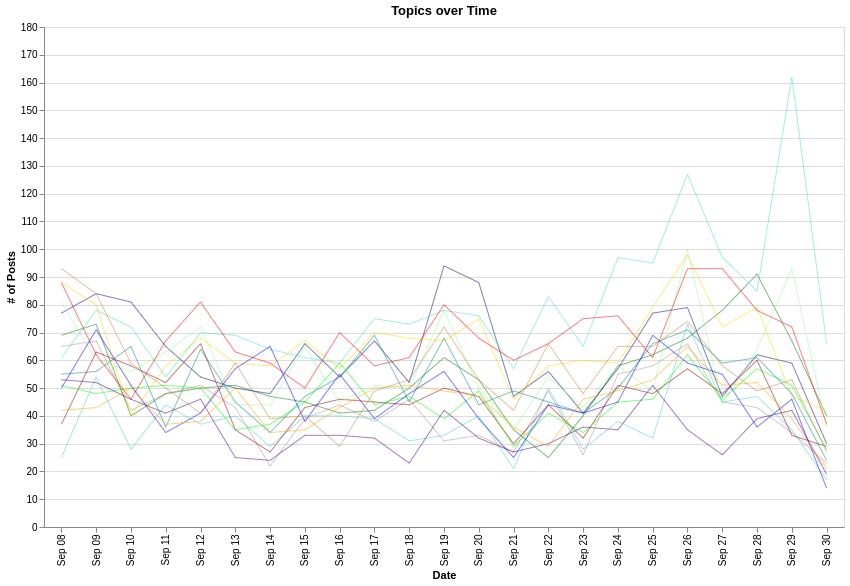

In [32]:
grouped.columns = ["count", "sum", "mean"]
grouped_cleaned = grouped.drop("-", level="topic_interpretation") # drop not interpreted topics, otherwise merge to one
p_data = grouped_cleaned.reset_index().round(2)
p_data["Topic"] = p_data.topic_interpretation
p_data["color"] = p_data.topic_interpretation.map(topic_color) 

highlight = alt.selection(type="single", on="mouseover", fields=["Topic"],
                          nearest=True)

base = alt.Chart(p_data, title="Topics over Time").mark_line().encode(
    x=alt.X("monthdate(dateCreated):O", title="Date"),
    y=alt.Y("count:Q", title="# of Posts",
            scale=alt.Scale(domain=(0, 170))),
    #color=alt.Color("Topic:N", scale=alt.Scale(scheme="tableau20")),
    color=alt.Color("color", scale=None),
    tooltip=[alt.Tooltip("Topic", title="Topic"),
             alt.Tooltip("dateCreated", title="Day"),
             alt.Tooltip("count", title="Posts")]
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=800,
    height=500
)

lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(0.5), alt.value(4))
)

chart = points + lines
#chart.save(os.path.join(figures_path, "topics", "topics_timeline.html"))
chart